In [1]:
#Dependencies
import requests
import json
from api_keys import api_key_FBI
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np



In [3]:
# the abbreviation of every state.
state_codes = pd.DataFrame({"Abbreviation":['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT',"DC",
                'DE', 'FL',"FS", 'GA',"GM", 'HI', 'IA',"ID", 'IL', 'IN',
                'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 
                'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 
                'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 
                'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 
                'TX', 'UT', 'VT', 'VA', 'WA', "VI",'WV', 'WI', 'WY']})

data_homicide=state_codes.copy()
data_homicide["Total Homicide"]=""
data_homicide.head()



,Abbreviation,Total Homicide
0,AL,
1,AK,
2,AZ,
3,AR,
4,CA,


# INFORMATION OF FBI HOMICIDE OF 2021

In [3]:
for index,row in data_homicide.iterrows():
    try:
        #with this we get the information of FBI API
        state=row["Abbreviation"]
        base_url=f"https://api.usa.gov/crime/fbi/cde/shr/state/{state}/victim/sex?from=2021&to=2021&API_KEY={api_key_FBI}"
        #print(base_url)
        response = requests.get(base_url)
        response= response.json()

        data_homicide.loc[index,"Total Homicide"]=response["data"][0]["Unknown"]+response["data"][0]["Male"]+response["data"][0]["Female"]
    except:
        data_homicide.loc[index, "Total Homicide"] = None


data_homicide.head(54)
# List all 54 states in order showing the number of total Homicides   


,Abbreviation,Total Homicide
0,AL,309
1,AK,18
2,AZ,190
3,AR,321
4,CA,123
5,CO,358
6,CT,148
7,DC,109
8,DE,94
9,FL,None


In [4]:
data_homicide= data_homicide.dropna(how = "any")
data_homicide["Total Homicide"] = data_homicide["Total Homicide"].astype(int)
data_homicide = data_homicide.sort_values("Total Homicide")
data_homicide.head(50)

,Abbreviation,Total Homicide
13,HI,6
47,VT,8
31,NH,14
36,ND,14
53,WY,17
1,AK,18
21,ME,18
43,SD,26
28,MT,31
15,ID,36


In [5]:
# want to get the statistical overview?
data_homicide.describe()

,Total Homicide
count,49.00000
mean,297.77551
std,354.79444
min,6.00000
25%,85.00000
50%,169.00000
75%,438.00000
max,2064.00000


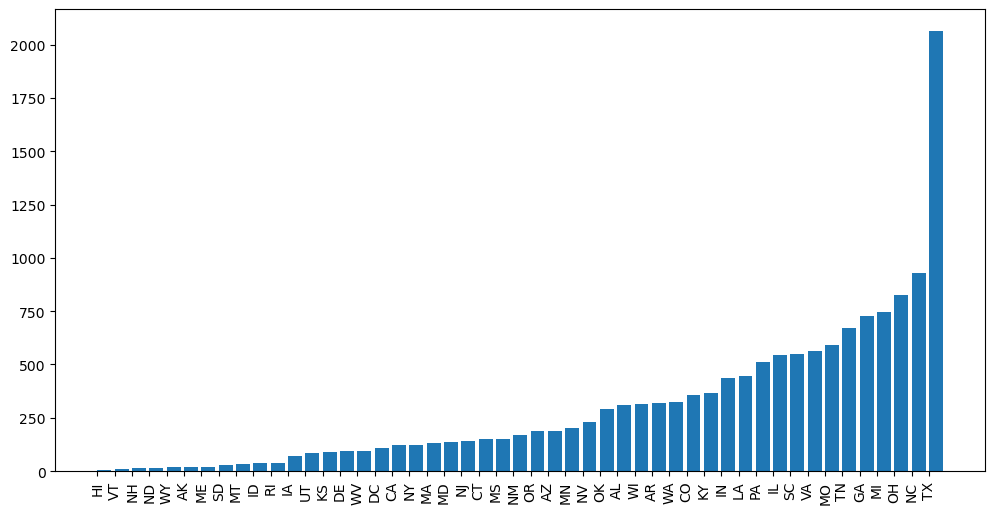

In [8]:
# Generate a bar plot showing the total number of rows 
plt.figure(figsize=(12, 6))
plt.bar(data_homicide["Abbreviation"], data_homicide["Total Homicide"], align = "edge")
plt.xticks(rotation = 90)
plt.show()

# INFORMATION OF COST LIVING

In [2]:
cost_living_data=pd.read_csv("resources/cost-of-living-index-by-state-[updated-june-2023].csv")
cost_living_data["Rank"]=cost_living_data["2023"]
cost_living_data["State"]=cost_living_data["state"]
cost_living_data=cost_living_data.loc[:,["State","Rank"]]

cost_living_data.head(54)


,State,Rank
0,Hawaii,179.0
1,District of Columbia,148.7
2,Massachusetts,148.4
3,California,134.5
4,New York,125.1
5,Alaska,124.4
6,Maryland,119.5
7,Oregon,115.1
8,Washington,115.1
9,New Hampshire,115.0


In [3]:
cost_living_data.describe()

,Rank
count,51.000000
mean,104.001961
std,18.240970
min,85.300000
25%,91.750000
50%,96.500000
75%,112.300000
max,179.000000


In [24]:
cost_living_data = pd.read_csv("resources/cost-of-living-index-by-state-[updated-june-2023].csv")

# Create a new DataFrame with the desired columns
new_table = cost_living_data.loc[:, ["2023", "state", "GroceryCostsIndex", "HousingCostsIndex", "MiscCostsIndex", "TransportationCostsIndex", "UtilityCostsIndex"]]

# Rename the columns "2023" and "state" to "Rank" and "State" respectively
new_table.rename(columns={"2023": "Rank", "state": "State"}, inplace=True)

# Display the new table
new_table

,Rank,State,GroceryCostsIndex,HousingCostsIndex,MiscCostsIndex,TransportationCostsIndex,UtilityCostsIndex
0,179.0,Hawaii,125.6,309.7,123.8,140.3,141.1
1,148.7,District of Columbia,106.9,241.8,117.7,107.9,110.2
2,148.4,Massachusetts,105.0,219.5,125.8,127.5,126.1
3,134.5,California,112.3,186.5,110.9,124.1,124.8
4,125.1,New York,103.0,173.3,109.0,106.7,102.5
5,124.4,Alaska,127.4,118.1,118.8,121.9,148.1
6,119.5,Maryland,108.5,152.2,108.5,100.2,109.2
7,115.1,Oregon,107.6,139.9,105.8,113.6,94.0
8,115.1,Washington,109.7,129.4,110.8,117.1,92.2
9,115.0,New Hampshire,102.3,109.8,120.8,113.6,130.2


In [25]:
new_table.set_index("State", inplace=True)
description = new_table.describe()
description

,Rank,GroceryCostsIndex,HousingCostsIndex,MiscCostsIndex,TransportationCostsIndex,UtilityCostsIndex
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,104.001961,101.215686,109.049020,102.476471,102.611765,101.741176
std,18.240970,6.569395,46.903677,8.790531,10.902012,14.026406
min,85.300000,93.800000,68.000000,91.000000,88.300000,84.400000
25%,91.750000,97.300000,79.300000,96.250000,95.050000,92.700000
50%,96.500000,100.100000,92.100000,99.600000,99.400000,97.800000
75%,112.300000,103.000000,118.500000,106.450000,108.050000,106.550000
max,179.000000,127.400000,309.700000,125.800000,140.300000,148.100000


# INFORMATION of HEALTH COST

In [7]:
health_data=pd.read_csv("resources/data-hGOWY.csv")
health_data.head(54)

,Rank,State,Score,% of adults reporting unmet need for mental health treatment in the past year who did not receive care because of cost,Health Care Spending Per Capita
0,1,South Dakota,100.00,47.10%,"$11,736"
1,2,Louisiana,86.69,32.00%,"$9,796"
2,3,West Virginia,82.31,39.50%,"$12,019"
3,4,Florida,79.51,51.90%,"$9,501"
4,5,Wyoming,78.63,64.70%,"$10,296"
5,6,Nebraska,75.13,33.10%,"$9,974"
6,7,Maine,74.08,37.40%,"$11,505"
7,8,Delaware,73.91,28.10%,"$12,294"
8,9,New Hampshire,69.53,51.70%,"$11,359"
9,10,Oklahoma,69.35,47.30%,"$8,997"


In [26]:
states_USA=pd.read_csv("resources/states.csv")
resume=pd.merge(states_USA,health_data[["Score","State"]],on="State",how="inner")
resume = resume.rename(columns ={"Score": "Healthcare Score"})
resume.head(54)

,State,Abbreviation,Healthcare Score
0,Alabama,AL,49.21
1,Alaska,AK,64.97
2,Arizona,AZ,63.05
3,Arkansas,AR,42.03
4,California,CA,43.26
5,Colorado,CO,55.34
6,Connecticut,CT,62.00
7,Delaware,DE,73.91
8,District of Columbia,DC,31.17
9,Florida,FL,79.51


In [27]:
# Sort the DataFrame in ascending order based on the "Healthcare Rank" column (least to greatest)
sorted_resume = resume.sort_values(by="Healthcare Score", ascending=True)

# Display the first 54 rows of the sorted DataFrame
sorted_resume.head(54)

,State,Abbreviation,Healthcare Score
31,Michigan,MI,0.00
43,Washington,WA,1.93
20,Nevada,NV,18.21
11,Hawaii,HI,21.19
23,New Mexico,NM,29.60
8,District of Columbia,DC,31.17
34,Pennsylvania,PA,32.05
30,Massachusetts,MA,32.57
29,Oregon,OR,33.10
45,Wisconsin,WI,34.68


In [ ]:
# SUMMARY

In [88]:
resume=pd.merge(resume,cost_living_data,on="State",how="inner")
resume.head()

,State,Abbreviation,Rank_x,Rank_y
0,Alabama,AL,28,88.8
1,Alaska,AK,12,124.4
2,Arizona,AZ,13,107.2
3,Arkansas,AR,33,90.3
4,California,CA,32,134.5


In [91]:
resume=pd.merge(resume,data_homicide,on="Abbreviation",how="inner")
resume.head()

,State,Abbreviation,Rank_x,Rank_y,Total Homicide
0,Alabama,AL,28,88.8,309
1,Alaska,AK,12,124.4,18
2,Arizona,AZ,13,107.2,190
3,Arkansas,AR,33,90.3,321
4,California,CA,32,134.5,123
